In [7]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(13)

## Dataset

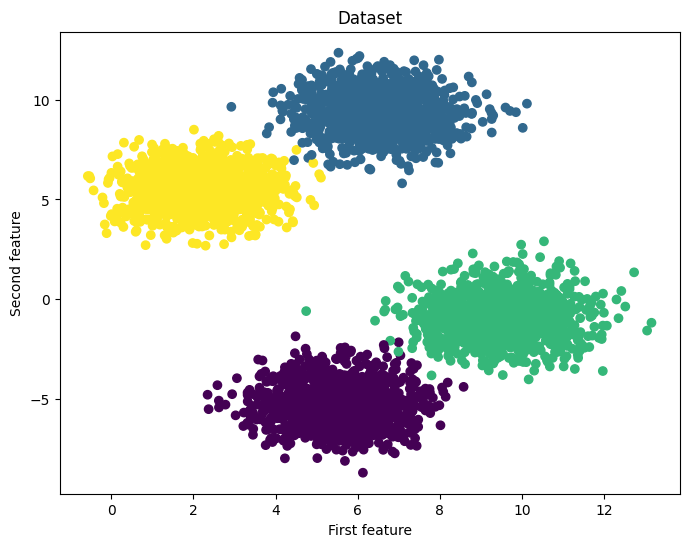

In [8]:
X, y_true = make_blobs(centers=4, n_samples = 5000)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [9]:
# reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (3750, 2)
Shape y_train: (3750, 1)
Shape X_test: (1250, 2)
Shape y_test: (1250, 1)


## Softmax regression class

In [10]:
class SoftmaxRegressor:

    def __init__(self):
        pass

    def train(self, X, y_true, n_classes, n_iters=10, learning_rate=0.1):
        """
        Trains a multinomial logistic regression model on given set of training data
        """
        self.n_samples, n_features = X.shape
        self.n_classes = n_classes

        self.weights = np.random.rand(self.n_classes, n_features)
        self.bias = np.zeros((1, self.n_classes))
        all_losses = []

        for i in range(n_iters):
            scores = self.compute_scores(X)
            probs = self.softmax(scores)
            y_predict = np.argmax(probs, axis=1)[:, np.newaxis]
            y_one_hot = self.one_hot(y_true)

            loss = self.cross_entropy(y_one_hot, probs)
            all_losses.append(loss)

            dw = (1 / self.n_samples) * np.dot(X.T, (probs - y_one_hot))
            db = (1 / self.n_samples) * np.sum(probs - y_one_hot, axis=0)

            self.weights = self.weights - learning_rate * dw.T
            self.bias = self.bias - learning_rate * db

            if i % 100 == 0:
                print(f'Iteration number: {i}, loss: {np.round(loss, 4)}')

        return self.weights, self.bias, all_losses

    def predict(self, X):
        """
        Predict class labels for samples in X.

        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            numpy array of shape (n_samples, 1) with predicted classes
        """
        scores = self.compute_scores(X)
        probs = self.softmax(scores)
        return np.argmax(probs, axis=1)[:, np.newaxis]

    def softmax(self, scores):
        """
        Tranforms matrix of predicted scores to matrix of probabilities

        Args:
            scores: numpy array of shape (n_samples, n_classes)
            with unnormalized scores
        Returns:
            softmax: numpy array of shape (n_samples, n_classes)
            with probabilities
        """
        exp = np.exp(scores)
        sum_exp = np.sum(np.exp(scores), axis=1, keepdims=True)
        softmax = exp / sum_exp

        return softmax

    def compute_scores(self, X):
        """
        Computes class-scores for samples in X

        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            scores: numpy array of shape (n_samples, n_classes)
        """
        return np.dot(X, self.weights.T) + self.bias

    def cross_entropy(self, y_true, probs):
        loss = - (1 / self.n_samples) * np.sum(y_true * np.log(probs))
        return loss

    def one_hot(self, y):
        """
        Tranforms vector y of labels to one-hot encoded matrix
        """
        one_hot = np.zeros((self.n_samples, self.n_classes))
        one_hot[np.arange(self.n_samples), y.T] = 1
        return one_hot

## Initializing and training the model

Iteration number: 0, loss: 3.1901
Iteration number: 100, loss: 0.2031
Iteration number: 200, loss: 0.1589
Iteration number: 300, loss: 0.1358
Iteration number: 400, loss: 0.1199
Iteration number: 500, loss: 0.1079
Iteration number: 600, loss: 0.0982
Iteration number: 700, loss: 0.0902


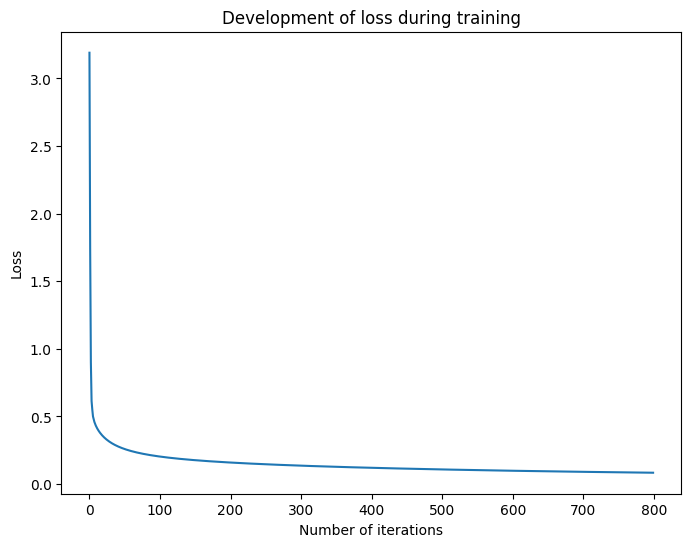

In [11]:
regressor = SoftmaxRegressor()
w_trained, b_trained, loss = regressor.train(X_train, y_train, learning_rate=0.1, n_iters=800, n_classes=4)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(800), loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

## Testing the model

In [12]:
n_test_samples, _ = X_test.shape
y_predict = regressor.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples) * 100}%")

Classification accuracy on test set: 99.03999999999999%
